## Описание проекта

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

## Описание данных

Файл /datasets/hypothesis.csv. Скачать датасет
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv. Скачать датасет
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузка данных и подготовка их к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# чтение файлов с данными
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    )

In [3]:
pd.options.display.max_colwidth = 150
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем название колонок к нижнему регистру:

In [4]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]
orders.columns = [x.lower() for x in orders.columns]

In [5]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Столбцы с датами приаедем к типу datetime: 

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим на явные дубликаты:

In [8]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


## Часть 1. Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета:

In [9]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],2)
hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета:

In [10]:
hypothesis['rice'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],2)
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении RICE вместо ICE приоритизация гипотез изменилась так как фреймворк RICE учитиывет еще и скольких пользователей затронет изменение.

## Часть 2. Анализ A/B-теста

### График кумулятивной выручки по группам.

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

#получим агрегированные кумулятивные данные о заказах по дням: 
orders_aggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])
orders_aggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [12]:
#получим агрегированные кумулятивные данные по дням о посетителях:
visitors_aggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [13]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [14]:
# Разделим датафреймы по группам
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders','visitors']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders','visitors']]

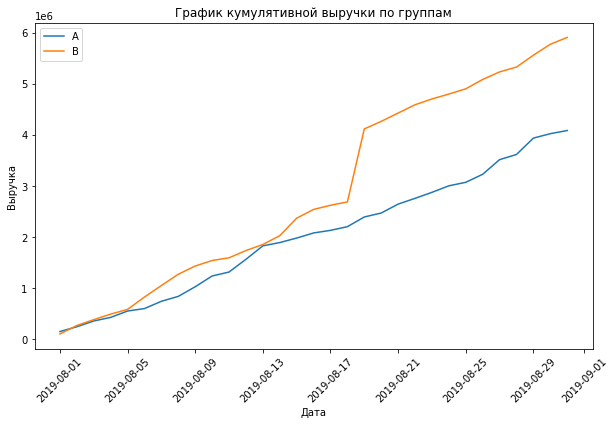

In [15]:
# Строим график
plt.figure(figsize=(10,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.show()

По графику видно, что выручка в группе 'A' меньше чем в группе 'B' и она растет линейно. В группе 'B' есть вслеск в райноне 17 августа. Это может быть связанно с оформлением очень дорогого заказа или с резким увелисением количества заказов.

### График кумулятивного среднего чека по группам.

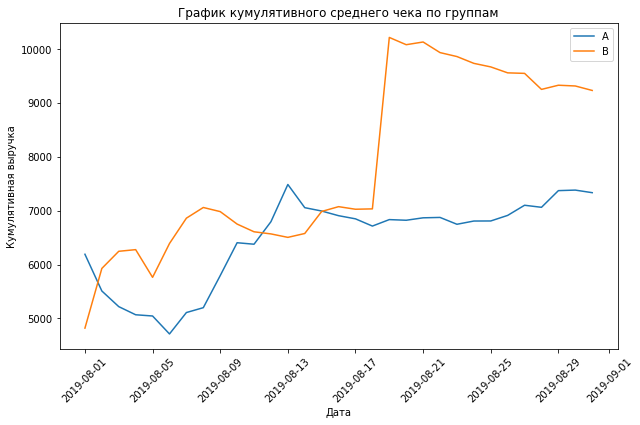

In [16]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Кумулятивная выручка")
plt.xlabel("Дата")
plt.show()

В группе 'A' средний чек то падает то растет, к середине месяца исследования он стабилизируется. В группе 'B' наблюдаем почти стабильный рост среднего чека, и резкий рост 17 августа, что явно свидетельствует об очень дорогой покупке.

### График относительного изменения кумулятивного среднего чека группы B к группе A

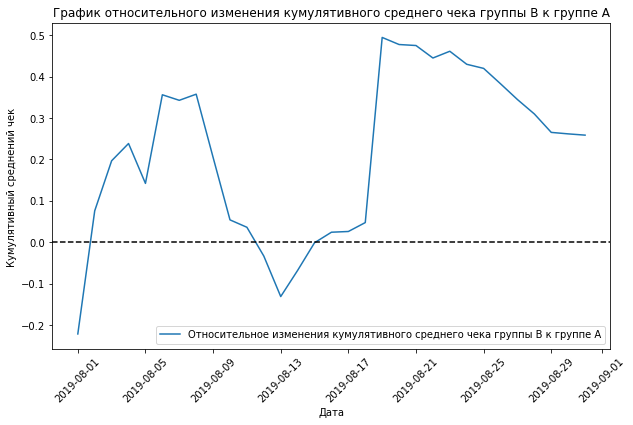

In [17]:
merged_сumulative_average_bill = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['a', 'b'])
merged_сumulative_average_bill['average_bill_a']=merged_сumulative_average_bill['revenuea']/merged_сumulative_average_bill['ordersa']
merged_сumulative_average_bill['average_bill_b']=merged_сumulative_average_bill['revenueb']/merged_сumulative_average_bill['ordersb']
plt.plot(merged_сumulative_average_bill['date'], merged_сumulative_average_bill['average_bill_b']/merged_сumulative_average_bill['average_bill_a']-1, 
         label="Относительное изменения кумулятивного среднего чека группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel("Кумулятивный среднений чек ")
plt.xlabel("Дата")
plt.show()


В некоторых местах чек резко возрастает и резко падает, что свидетельствует о реальзиции дорогих заказов.

### График кумулятивного среднего количества заказов на посетителя по группам.

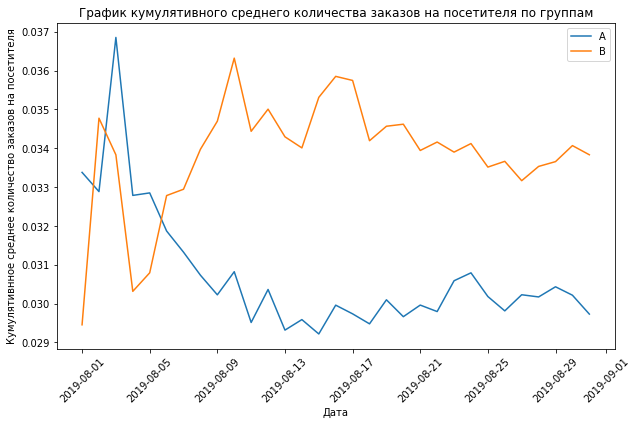

In [18]:
cumulative_revenue_a['avg_orders']=cumulative_revenue_a['orders']/cumulative_revenue_a['visitors']
cumulative_revenue_b['avg_orders']=cumulative_revenue_b['orders']/cumulative_revenue_b['visitors']

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['avg_orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['avg_orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel("Кумулятивнное среднее количество заказов на посетителя")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.show()


В группе 'B' число заказов на посетителя явно больше. Скачки есть в обеих группах.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

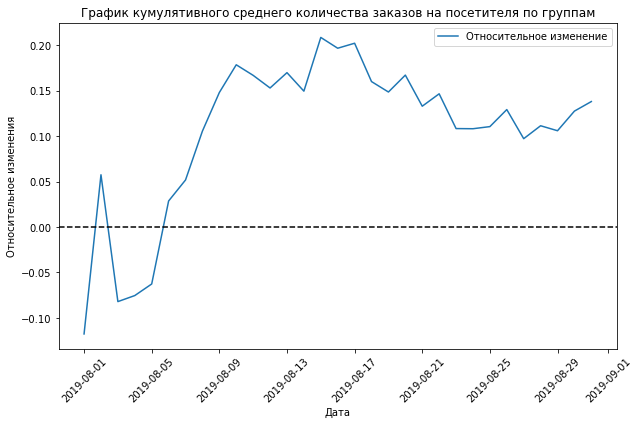

In [19]:
merged_сumulative_avg_orders = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['a', 'b'])
plt.plot(merged_сumulative_avg_orders['date'], merged_сumulative_avg_orders['avg_ordersb']/merged_сumulative_avg_orders['avg_ordersa']-1, 
         label="Относительное изменение")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel("Относительное изменения")
plt.xlabel("Дата")
plt.show()


В начале группа 'A' проигрывает группе 'B', но после вырывается вперед и лидирует до конца.  

### Точечный график количества заказов по пользователям.

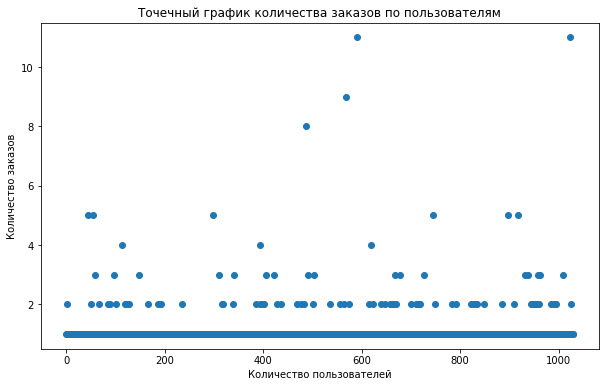

In [20]:
orders_by_users = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
orders_by_users.columns = ['userid', 'orders']

x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Большинство пользователей делают 1-2 заказа, но встречаются и те кто сделал более 10 заказов.

### 95-й и 99-й перцентили количества заказов на пользователя.

In [21]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали 2 заказа и не более 1% - 4. Все что выше 4-х заказов определим как аномалии. 

### Точечный график стоимостей заказов.

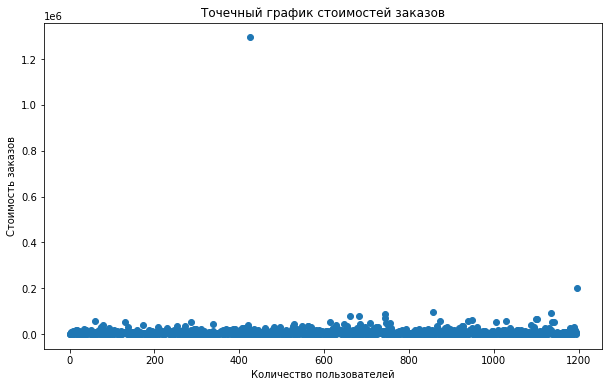

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

Большинство заказов сделаны по минимальной стоимости, но также отчетливо видны выбросы.

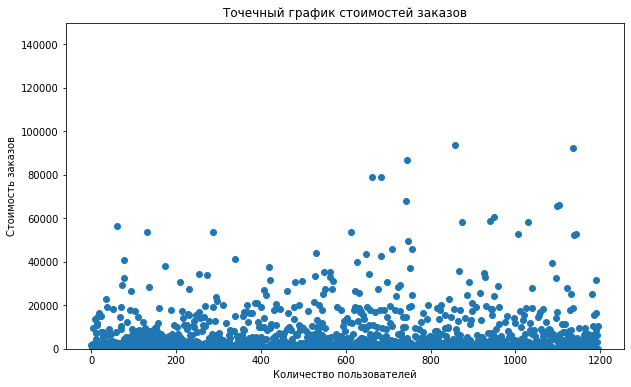

In [23]:
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

###  95-й и 99-й перцентили стоимости заказов

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% пользователей совершали заказы за 28000 и не более 1% за 58233.2. Все что выше 58233.2 определим как аномалии.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы: 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.
- alpha = 0.05
- Для проверки гипотез будем использовать тест Уилкоксона-Манна-Уитни.

In [25]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitorsPerDateA']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitorsCummulativeA']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitorsPerDateB']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitorsCummulativeB']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

In [26]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitorid', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitorid', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])), name='orders')
[orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])), name='orders')] 

sampleA = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitorid', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = .05
pvalue = stats.mannwhitneyu(sampleB, sampleA)[1]
print('p-value:{0:.5f}'.format(pvalue))
if (pvalue < alpha):
    print("Различия в среднем между количеством заказов в группах есть")
else:
    print("Различий в среднем количестве заказов между группами нет")
print('Прирост В к А:{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

p-value:0.01679
Различия в среднем между количеством заказов в группах есть
Прирост В к А:0.138


По «сырым» данным различия в среднем между количеством заказов в группах есть

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [27]:
pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value:{0:.5f}'.format(pvalue))
if (pvalue < alpha):
    print("Различия в среднем чеке заказа между группами есть")
else:
    print("Различий в среднем чеке заказа между группами нет")
print('Прирост В к А:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:0.72929
Различий в среднем чеке заказа между группами нет
Прирост В к А:0.259


По «сырым» данным различий в среднем чеке заказа между группами нет

###  Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Отбросим пользователей которые сделали более 4-х заказов и заказы дороже 58233.2.

In [28]:
orders_max = np.percentile(orders_by_users['orders'], 99)
revenue_max = np.percentile(orders['revenue'], 99)

usersWithManyOrders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > orders_max]['visitorid'],
        orders_by_users_b[orders_by_users_b['orders'] > orders_max]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_max]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())


In [29]:
print("Число пользователей с большим количеством заказов:", usersWithManyOrders.count())
print("Относительные потери:", round(usersWithManyOrders.count()/len(orders['visitorid'].unique())*100,2),'%')
print("Число пользователей с дорогими заказами:", usersWithExpensiveOrders.count())
print("Относительные потери:", round(usersWithExpensiveOrders.count()/len(orders['visitorid'].unique())*100,2),'%')

Число пользователей с большим количеством заказов: 5
Относительные потери: 0.48 %
Число пользователей с дорогими заказами: 12
Относительные потери: 1.16 %


In [30]:
sampleAFiltered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)    

In [31]:
pvalue = stats.mannwhitneyu(sampleBFiltered, sampleAFiltered)[1]
#print({pvalue})
print('p-value:{0:.5f}'.format(pvalue))
if (pvalue < alpha):
    print("Различия в среднем между количеством заказов в группах есть")
else:
    print("Различий в среднем количестве заказов между группами нет")
print('Прирост В к А:{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value:0.01438
Различия в среднем между количеством заказов в группах есть
Прирост В к А:0.153


По «очищенным» данным различия в среднем между количеством заказов в группах тоже есть.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [32]:
pvalue = stats.mannwhitneyu( orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
        
print('p-value:{0:.5f}'.format(pvalue))
if (pvalue < alpha):
    print("Различия в среднем чеке заказа между группами есть")
else:
    print("Различий в среднем чеке заказа между группами нет")

print(
    "Прирост В к А {0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value:0.85091
Различий в среднем чеке заказа между группами нет
Прирост В к А -0.00575


По «очищенным» данным различий в среднем чеке заказа между группами нет.

## Выводы: 

1. Отделу мартетига следует поробовать запустить гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Если требуется учитывать охват пользователей то обратить внимание на гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

2. Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.
3. Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.
4. График относительного изменения кумулятивного среднего количества заказов на посетителя группы 'B' к группе 'A' показывает что результаты группы 'B' лучше.
5. По  результатам рекомендую становить тест, зафиксировать победу группы 'B'.